In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

In [11]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

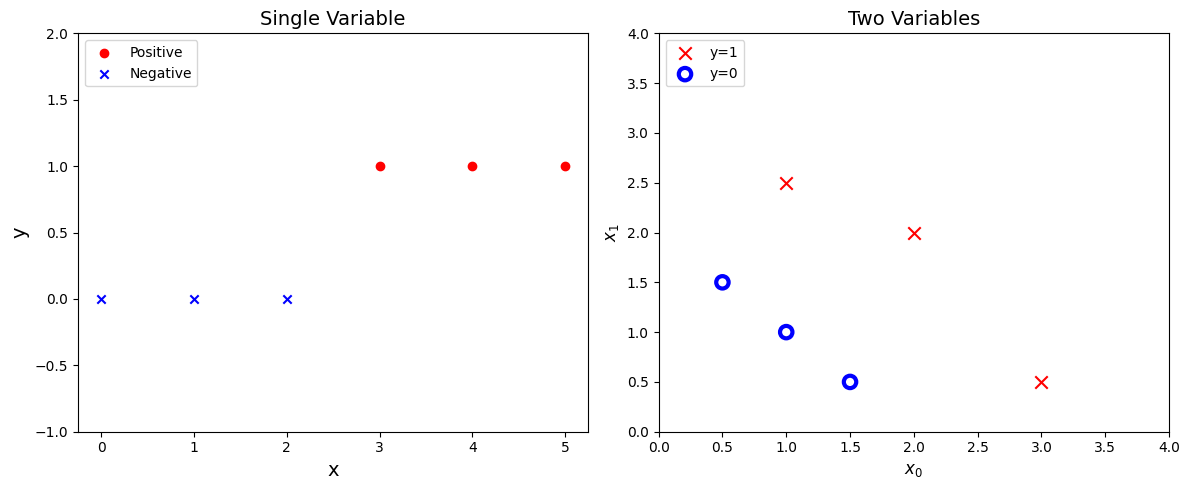

In [12]:
pos = (y_train == 1)
neg = (y_train == 0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# single variable
ax[0].scatter(x_train[pos], y_train[pos], color='red', marker='o', label='Positive')
ax[0].scatter(x_train[neg], y_train[neg], color='blue', marker='x', label='Negative')
ax[0].set_ylim(-1, 2)
ax[0].set_xlabel('x', fontsize=14)
ax[0].set_ylabel('y', fontsize=14)
ax[0].legend(loc='upper left')
ax[0].set_title('Single Variable', fontsize=14)

# two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_xlabel('$x_0$', fontsize = 12)
ax[1].set_ylabel('$x_1$', fontsize = 12)
ax[1].set_title('Two Variables', fontsize=14)
ax[1].legend(loc='upper left')
plt.tight_layout()
plt.show()



In [13]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [28]:
z_temp = np.linspace(-5, 5, 100)
y = sigmoid(z_temp)
print(y)


[0.00669285 0.00739896 0.00817894 0.00904041 0.00999169 0.01104196
 0.01220126 0.01348063 0.01489212 0.01644893 0.01816549 0.02005754
 0.0221422  0.02443814 0.02696557 0.02974643 0.03280439 0.036165
 0.0398557  0.04390588 0.04834692 0.05321217 0.0585369  0.06435824
 0.07071501 0.07764755 0.0851974  0.093407   0.1023192  0.11197671
 0.12242144 0.13369374 0.14583148 0.1588691  0.17283646 0.18775769
 0.20364993 0.22052213 0.23837374 0.25719365 0.2769591  0.29763488
 0.31917283 0.34151151 0.36457644 0.38828059 0.41252537 0.43720205
 0.46219351 0.48737642 0.51262358 0.53780649 0.56279795 0.58747463
 0.61171941 0.63542356 0.65848849 0.68082717 0.70236512 0.7230409
 0.74280635 0.76162626 0.77947787 0.79635007 0.81224231 0.82716354
 0.8411309  0.85416852 0.86630626 0.87757856 0.88802329 0.8976808
 0.906593   0.9148026  0.92235245 0.92928499 0.93564176 0.9414631
 0.94678783 0.95165308 0.95609412 0.9601443  0.963835   0.96719561
 0.97025357 0.97303443 0.97556186 0.9778578  0.97994246 0.98183451


Text(0.5, 0, 'z')

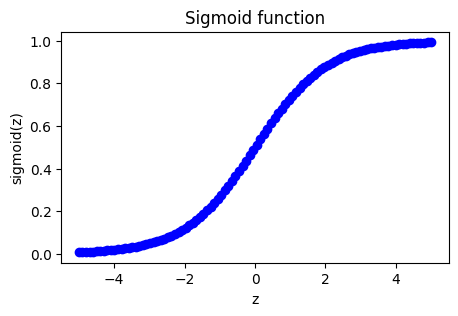

In [29]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(z_temp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')